## VGG16

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'/home/dev/Documents/Datasets/cats_and_dogs_small/train/'

In [4]:
validation_dir = r'/home/dev/Documents/Datasets/cats_and_dogs_small/validation/'

In [5]:
test_dir = r'/home/dev/Documents/Datasets/cats_and_dogs_small/test/'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 )

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
from tensorflow.keras.applications import VGG16

In [14]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58892288/58889256 [==============================] - 325s 6us/step


In [15]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [17]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 18,910,017
Non-trainable params: 0
_________________________________________________________________


In [19]:
## conv_base.trainable = False --> if u want to freez weights of final vgg convolutional layer . For freeze this layer this is used 
## this way we signigicantly reduce the parameters

In [20]:
from tensorflow.keras import optimizers

In [21]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=["acc"])

In [22]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_model-{epoch:02d}.h5")

In [23]:
history = model.fit(
    train_generator, 
    steps_per_epoch=100, 
    epochs=30,
    validation_data=validation_generator, 
    validation_steps=50,
    callbacks=[checkpoint_cb]
) 

Epoch 1/30
100/100 [==============================] - 1261s 13s/step - loss: 0.5802 - acc: 0.6813 - val_loss: 0.2134 - val_acc: 0.9090
Epoch 2/30
100/100 [==============================] - 1248s 12s/step - loss: 0.3026 - acc: 0.8705 - val_loss: 0.3549 - val_acc: 0.8370
Epoch 3/30
100/100 [==============================] - 1269s 13s/step - loss: 0.2190 - acc: 0.9075 - val_loss: 0.1434 - val_acc: 0.9440
Epoch 4/30
100/100 [==============================] - 1295s 13s/step - loss: 0.1696 - acc: 0.9272 - val_loss: 0.1078 - val_acc: 0.9590
Epoch 5/30
100/100 [==============================] - 1299s 13s/step - loss: 0.1333 - acc: 0.9497 - val_loss: 0.0874 - val_acc: 0.9600
Epoch 6/30
100/100 [==============================] - 1289s 13s/step - loss: 0.1393 - acc: 0.9493 - val_loss: 0.0941 - val_acc: 0.9600
Epoch 7/30
100/100 [==============================] - 1288s 13s/step - loss: 0.1123 - acc: 0.9577 - val_loss: 0.0825 - val_acc: 0.9670
Epoch 8/30
100/100 [==============================] - 8

In [24]:
model.save("project_cnn1.h5")

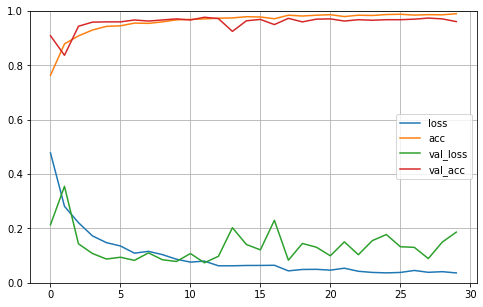

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

test_generator = test_datagen.flow_from_directory(
test_dir, target_size=(150,150), batch_size=20, class_mode='binary')


Found 1000 images belonging to 2 classes.


[0.2652609944343567, 0.9539999961853027]

In [28]:
model.evaluate_generator(test_generator, steps=50)

[0.2652610242366791, 0.9539999961853027]

In [30]:
model.predict_classes(test_generator)

/home/dev/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    